# Étude de l'erreur due à la diffusion et à la convection dans le cas du SWARM

In [1]:
import sys

sys.path = ['/home/as259691/PycharmProjects/FluidDyn1D'] + sys.path

In [2]:
from src.main import *
from src.plot_fields import *

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
Delta = 0.02
lda_1 = 5.5*10**-2
lda_2 = 15.5
rho_cp_1 = 70278.
rho_cp_2 = 702780.
d = 6./100*Delta/2.
markers = np.array([Delta/2. -d, Delta/2. + d])
alpha = (markers[1] - markers[0])/Delta
v = 0.2
dt = 1.
fo = 0.5

t_fin = 1.
dx = 3.9*10**-5
cfl = 0.5
schema = 'weno'
Formulation = [Problem, ProblemConserv2]

## Étude selon la formulation de l'équation

En fait s'il n'y a pas de convection il n'y a pas de différence entre les différentes formes, à l'exception de la moyenne utilisée pour $\frac{1}{\rho C_p}$

### RK4

3.4592383648166576e-06
Cas : mixte, rk4, weno, dx = 3.90626e-05, dt = 3.45924e-06, cfl = 0.0177112 dE*/dt* = -0.000000
3.4592383648166576e-06
Forme conservative boniou, Cas : mixte, rk4, weno, dx = 3.90626e-05, dt = 3.45924e-06, cfl = 0.0177112 dE*/dt* = 0.000000


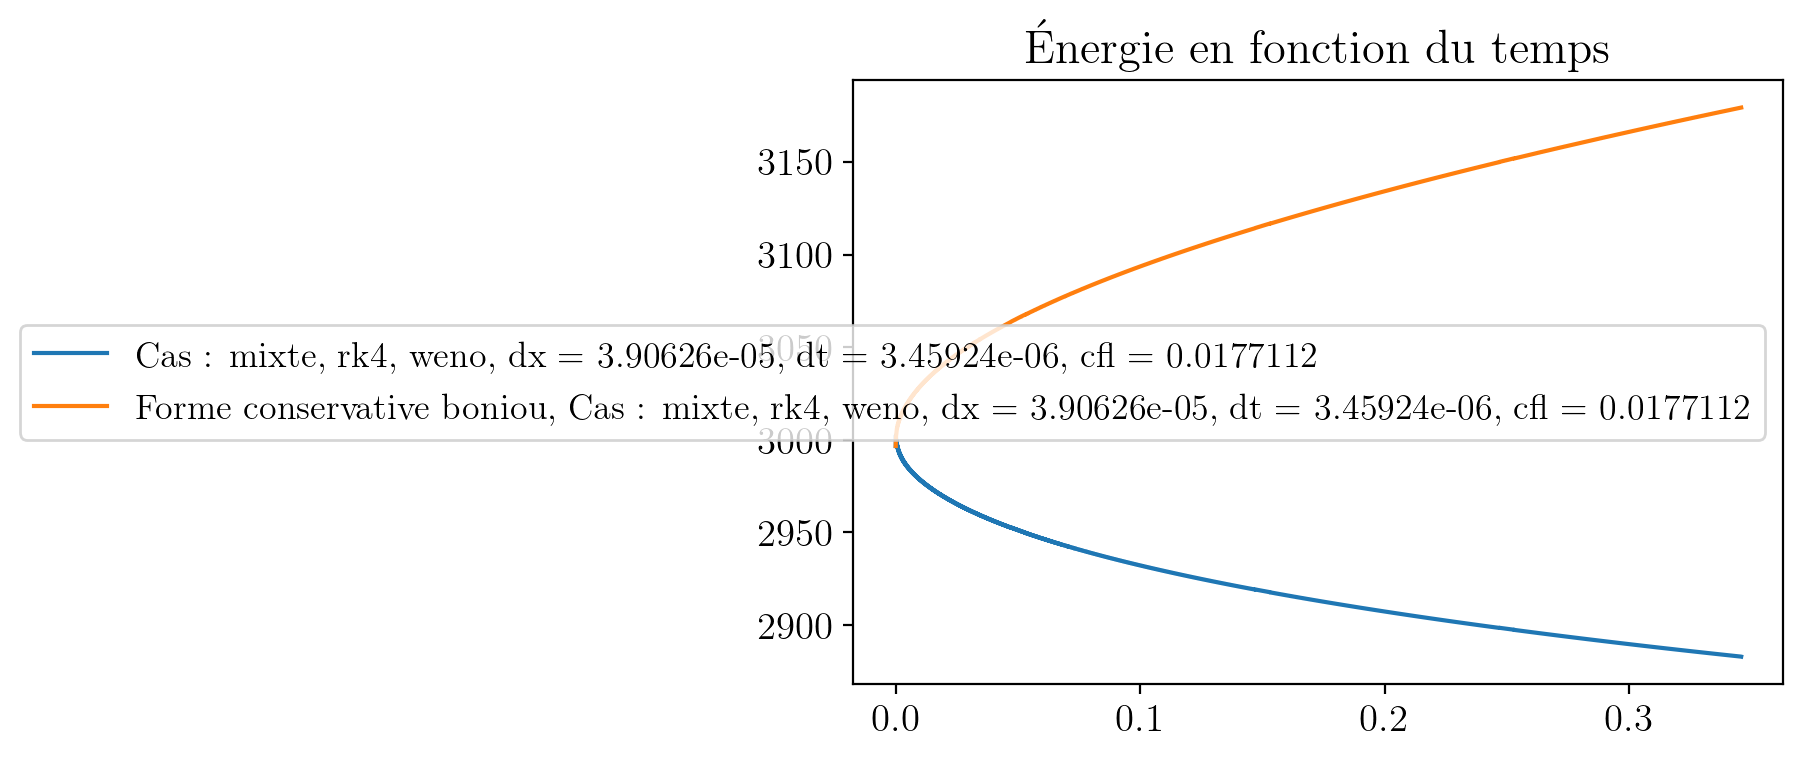

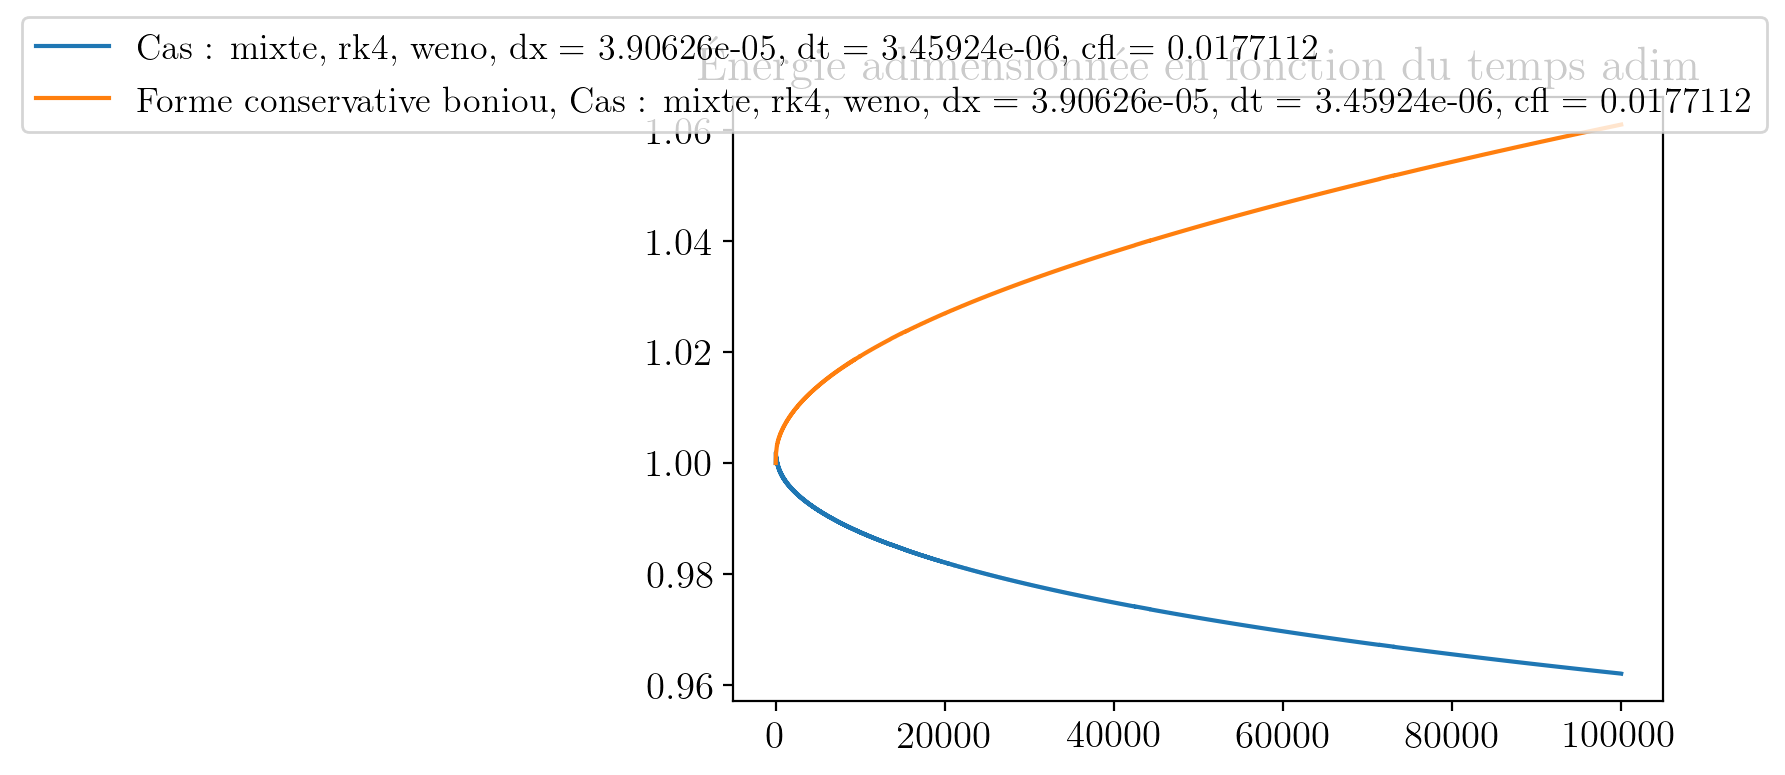

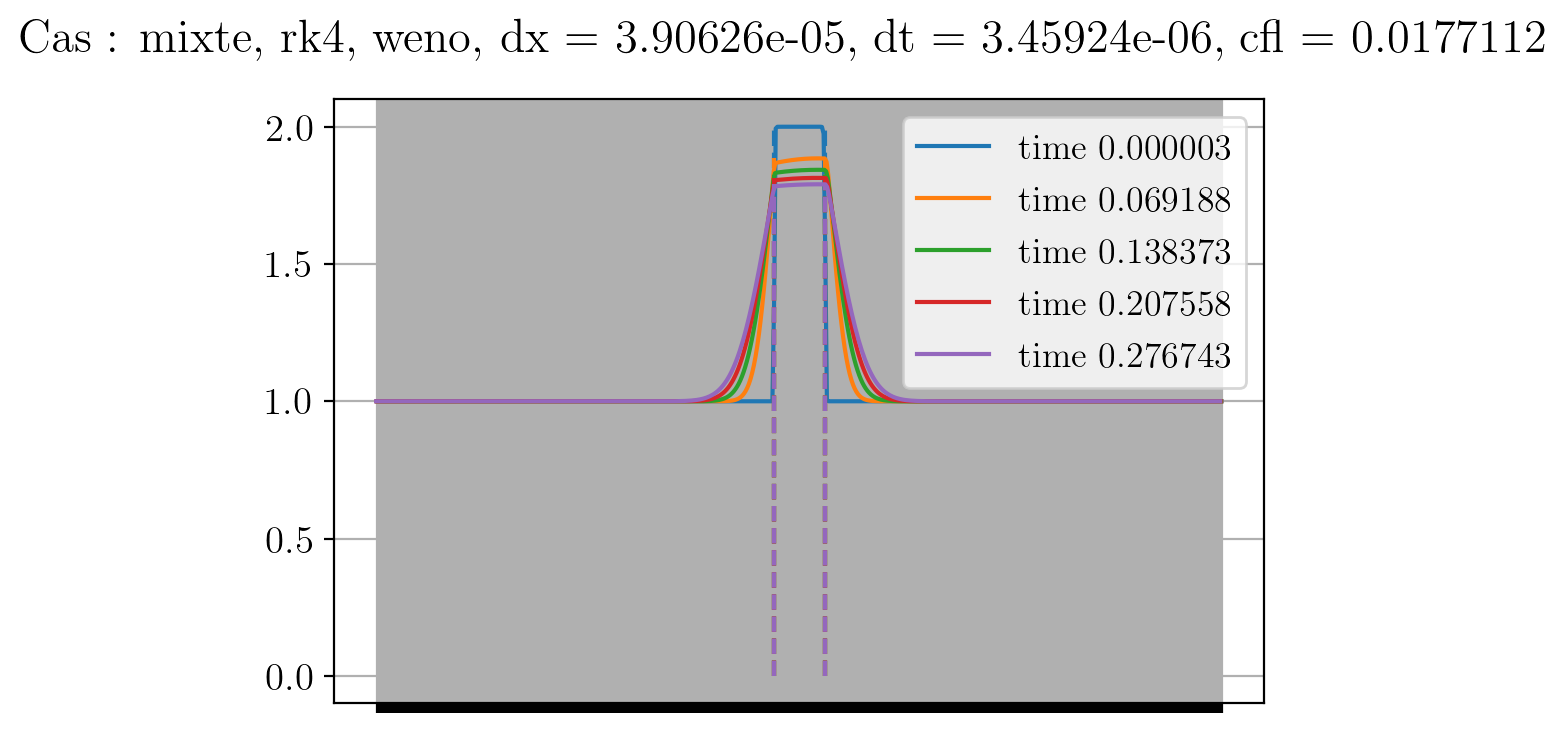

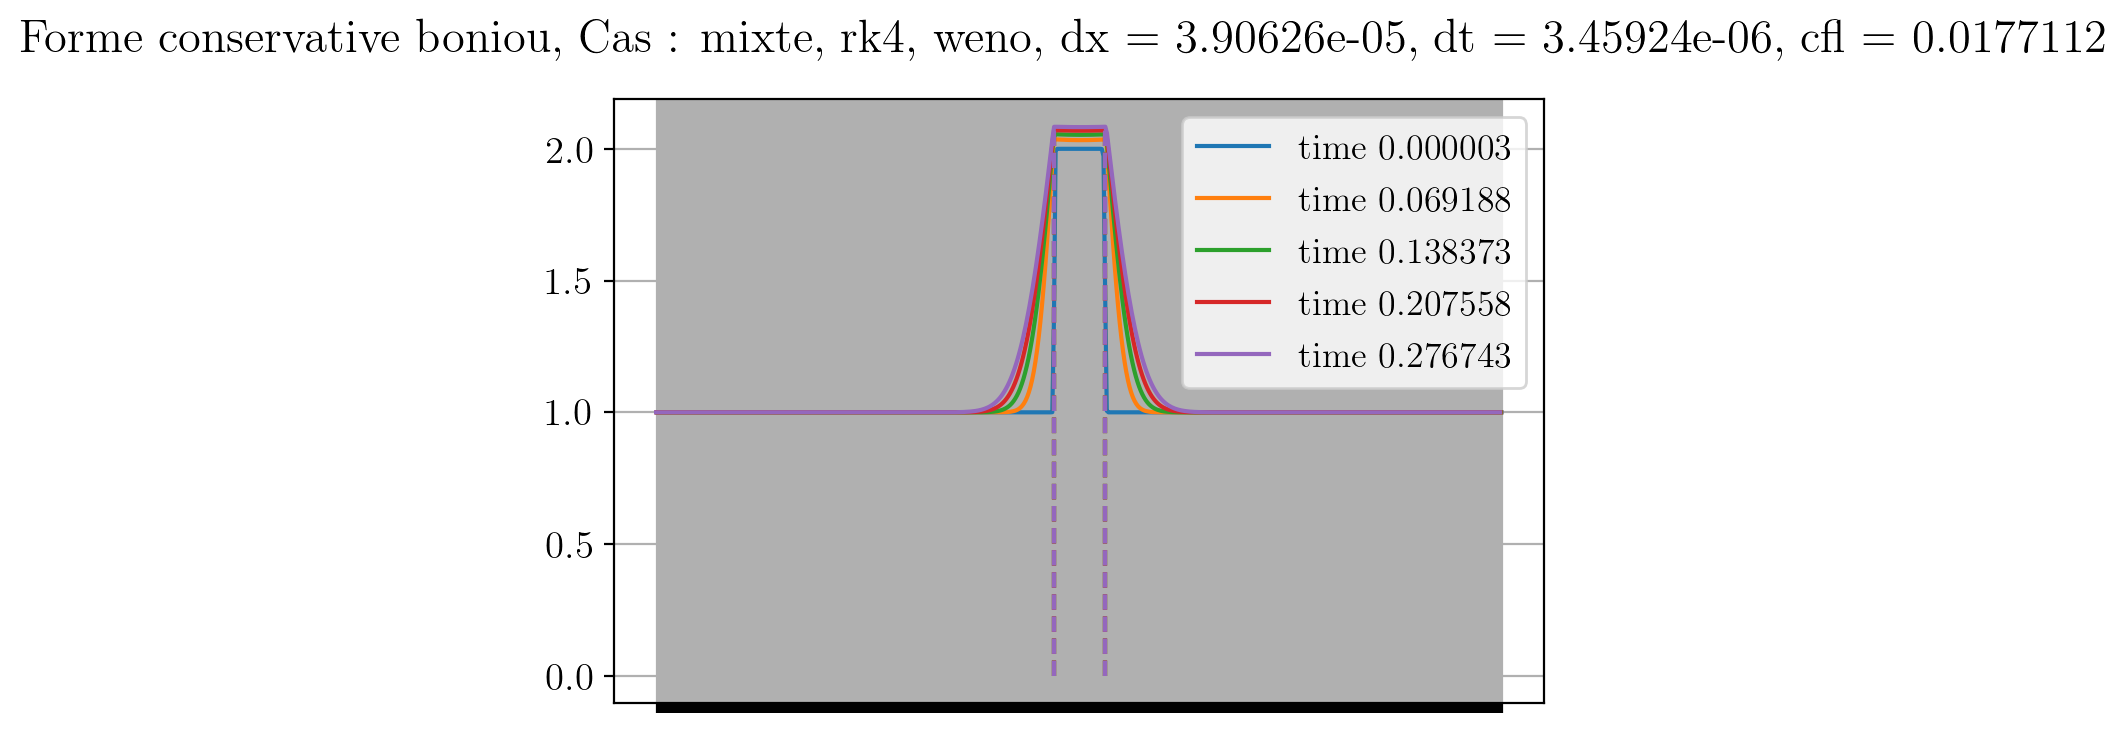

In [4]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    x, T = get_T_creneau(dx=dx, Delta=Delta, markers=markers)
    T = T + 1.
    prob = form(Delta, dx, lda_1, lda_2, rho_cp_1, rho_cp_2, markers, T, v, dt, cfl, fo,
                diff=1., schema=schema, time_scheme='rk4')
    E0 = prob.compute_energy()
    t, e = prob.timestep(n=100000, number_of_plots=5, debug=False, plotter=Plotter('decale'))
    l = ax1.plot(t, e, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()

### Euler

3.4592383648166576e-06
Cas : mixte, euler, weno, dx = 3.90626e-05, dt = 3.45924e-06, cfl = 0.0177112 dE*/dt* = -0.000000
3.4592383648166576e-06
Forme conservative boniou, Cas : mixte, euler, weno, dx = 3.90626e-05, dt = 3.45924e-06, cfl = 0.0177112 dE*/dt* = 0.000000


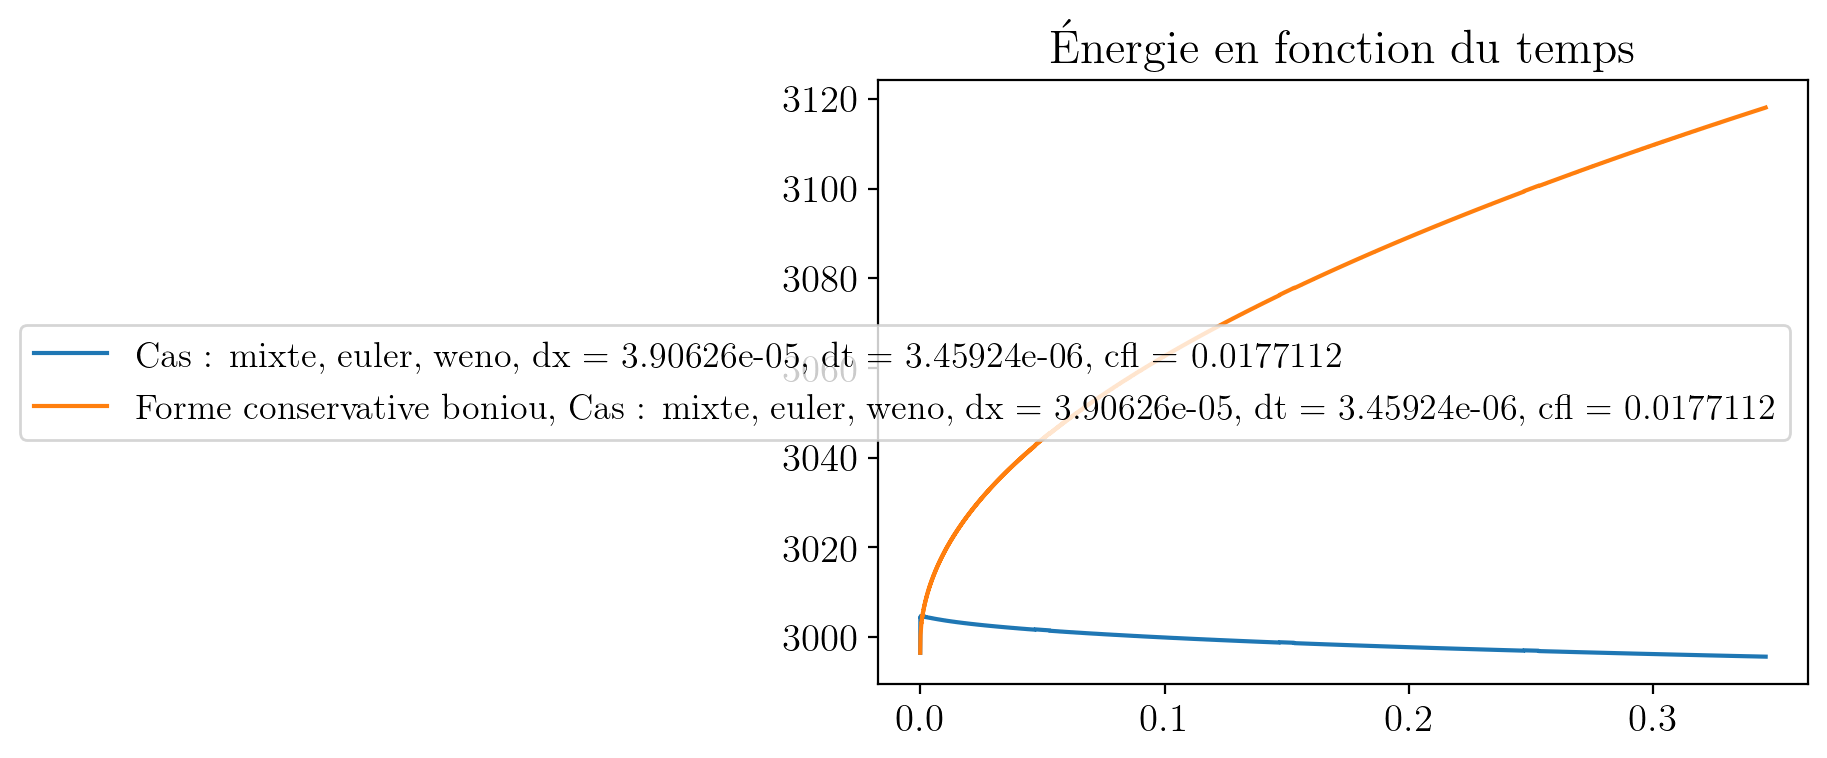

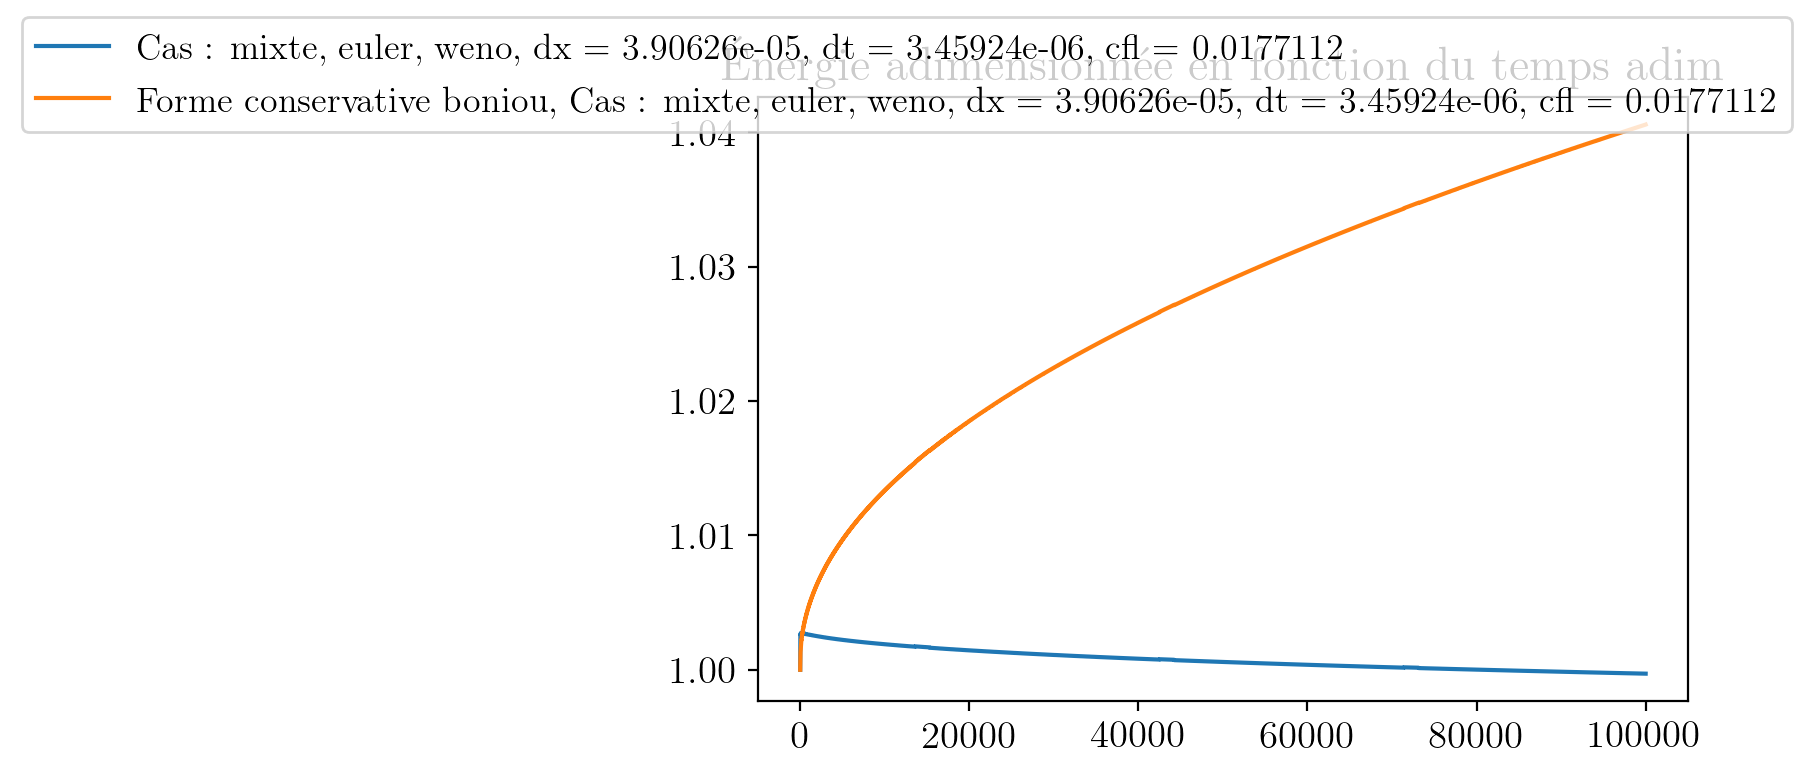

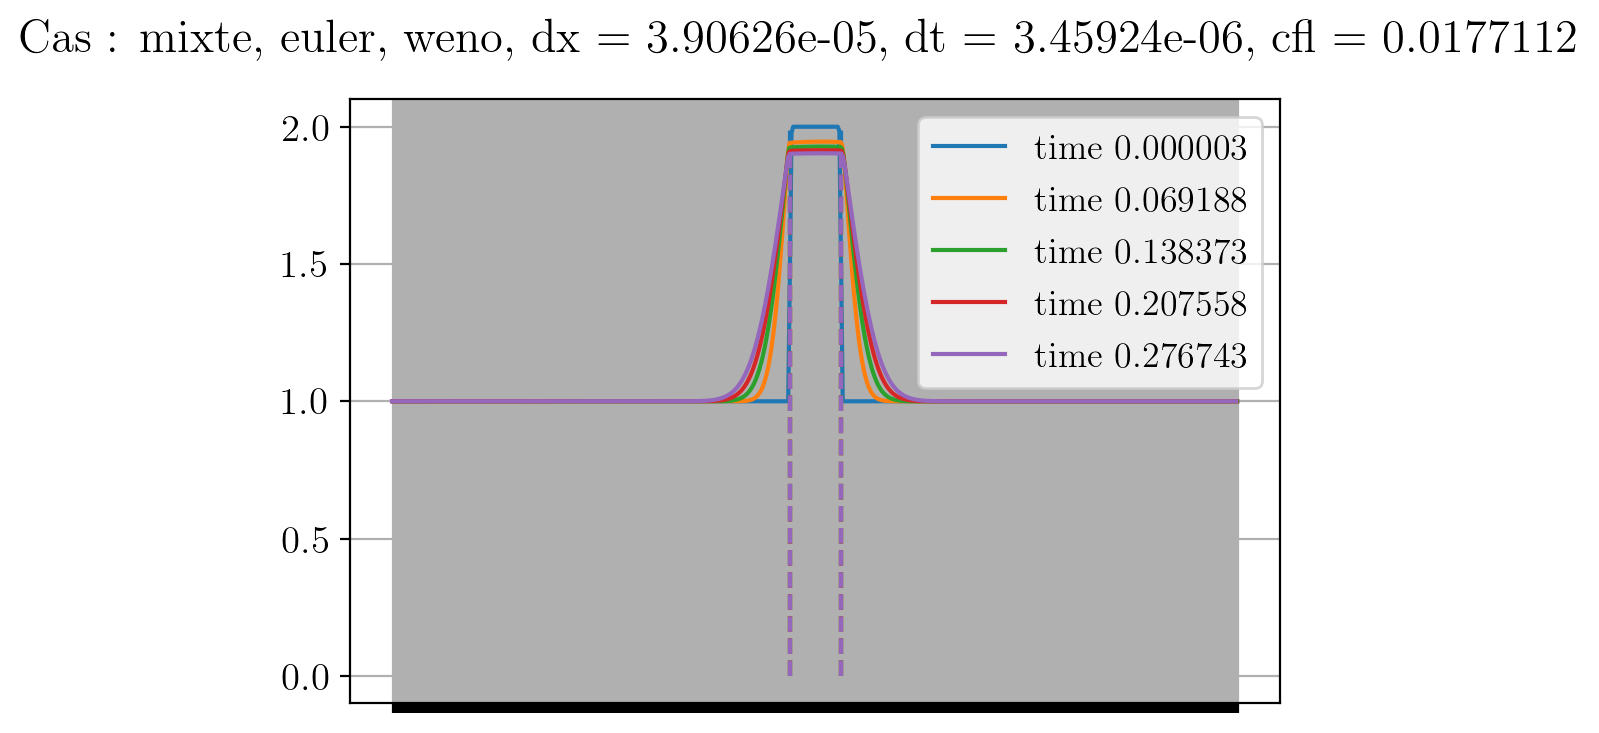

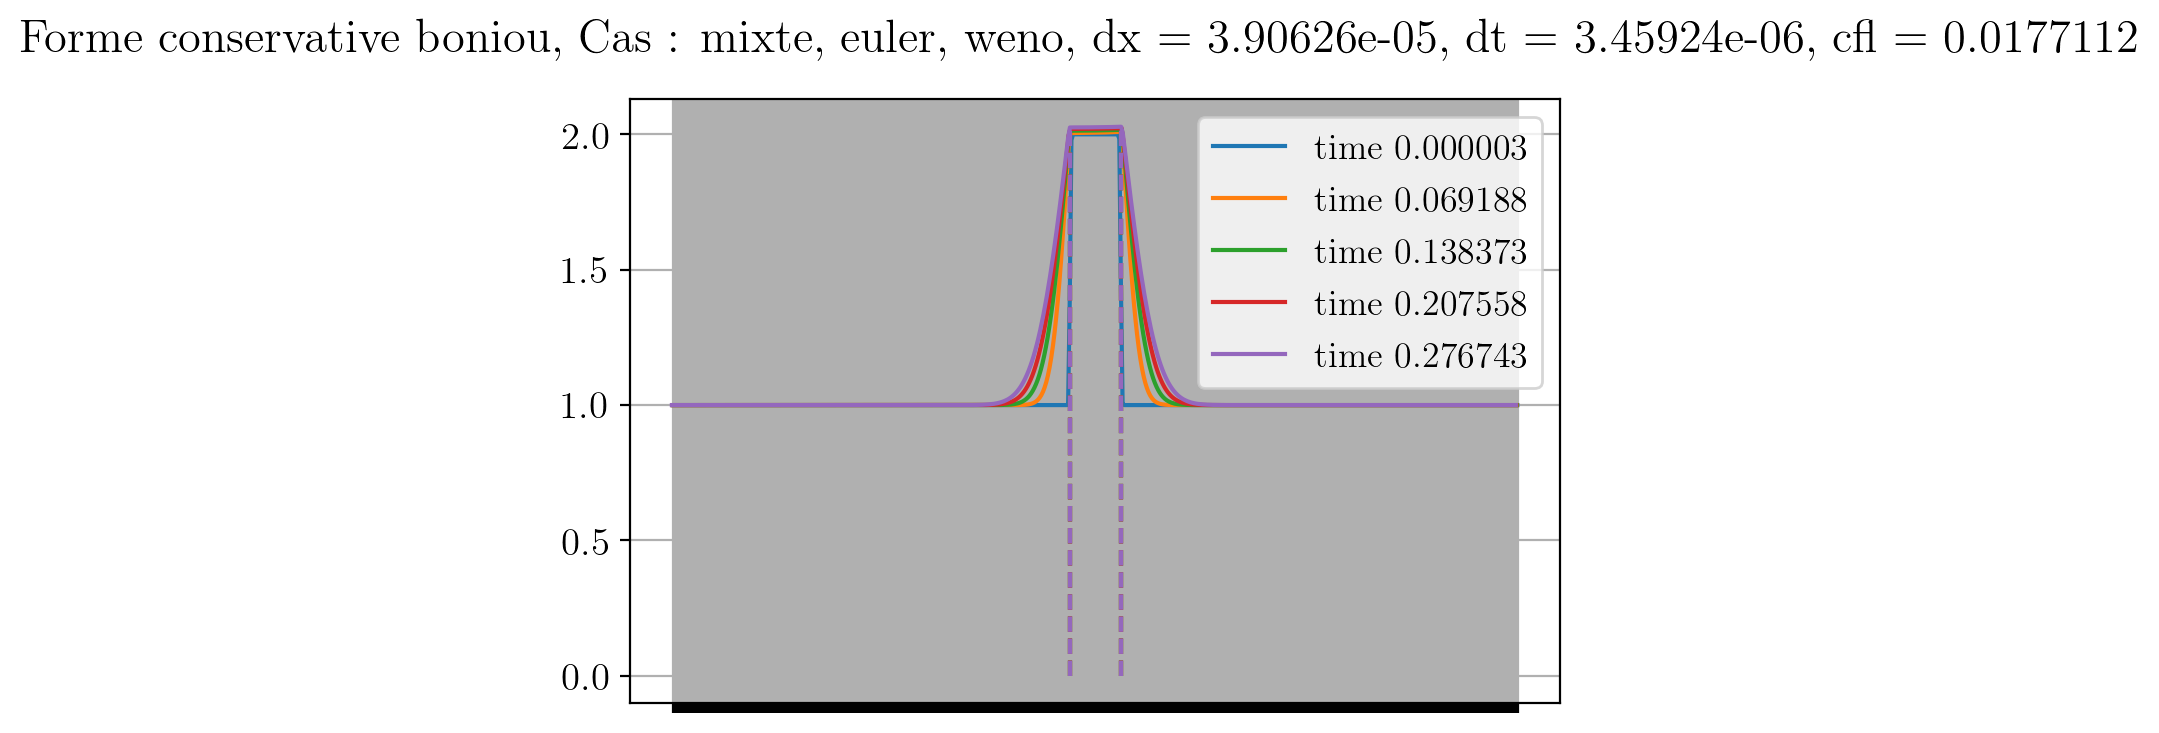

In [5]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    x, T = get_T_creneau(dx=dx, Delta=Delta, markers=markers)
    T = T + 1.
    prob = form(Delta, dx, lda_1, lda_2, rho_cp_1, rho_cp_2, markers, T, v, dt, cfl, fo,
                diff=1., schema=schema, time_scheme='euler')
    E0 = prob.compute_energy()
    t, e = prob.timestep(n=100000, number_of_plots=5, debug=False, plotter=Plotter('decale'))
    l = ax1.plot(t, e, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()

## Cas boniou, euler avec weno et upwind quand le stencil traverse l'interface

3.4592383648166576e-06
Cas : mixte, euler, weno upwind, dx = 3.90626e-05, dt = 3.45924e-06, cfl = 0.0177112 dE*/dt* = -0.000000
3.4592383648166576e-06
Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 3.90626e-05, dt = 3.45924e-06, cfl = 0.0177112 dE*/dt* = 0.000000


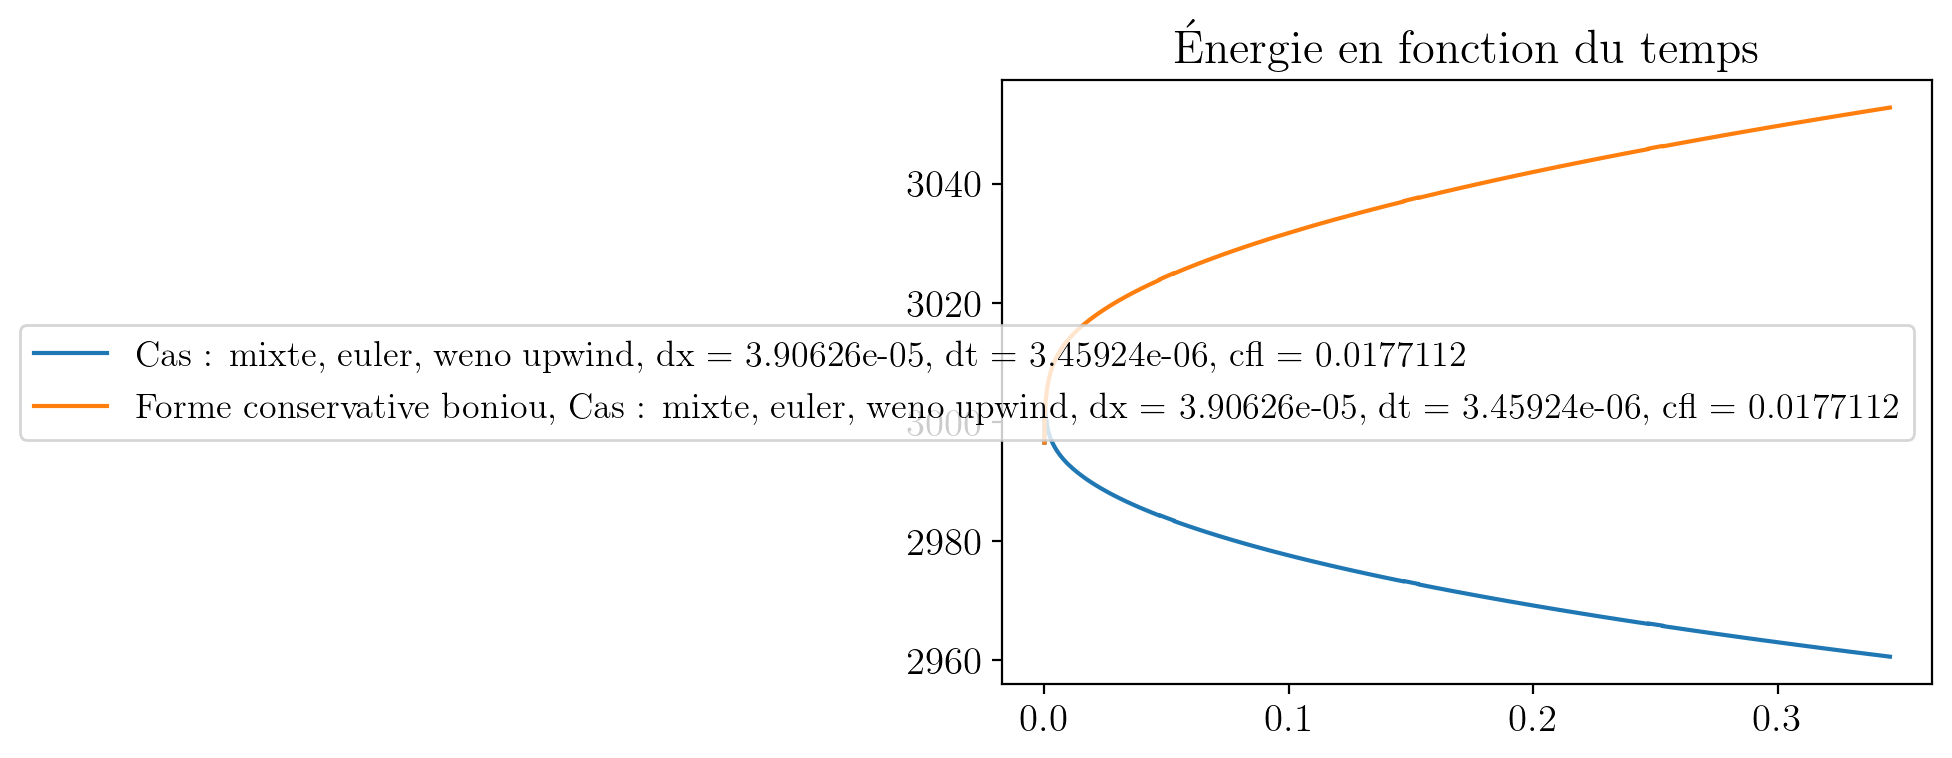

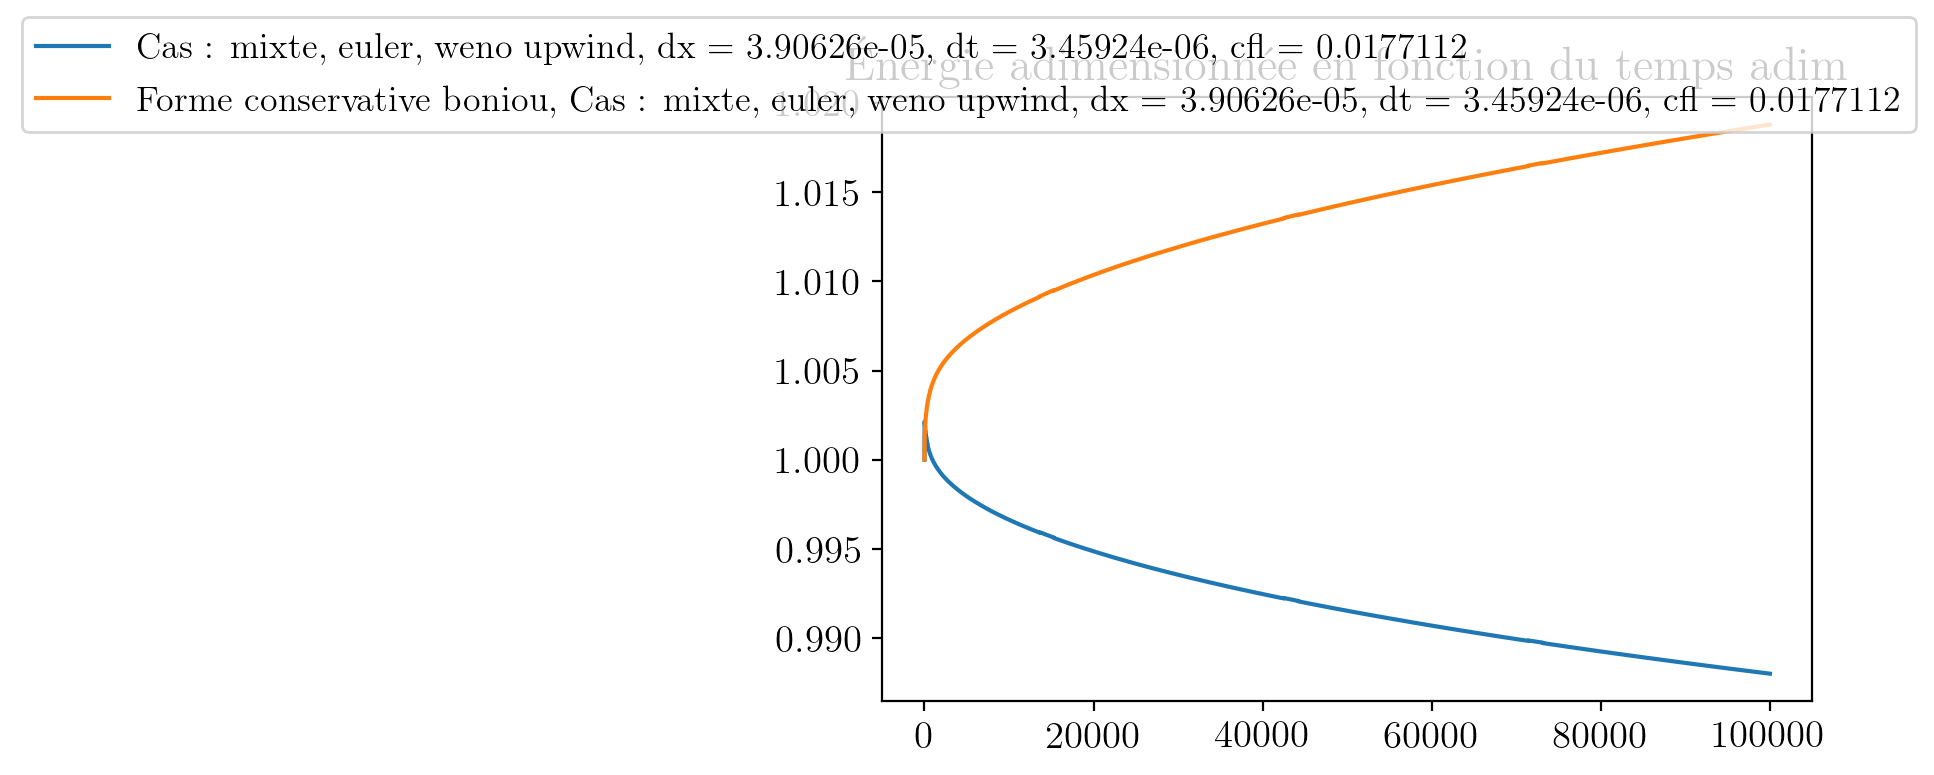

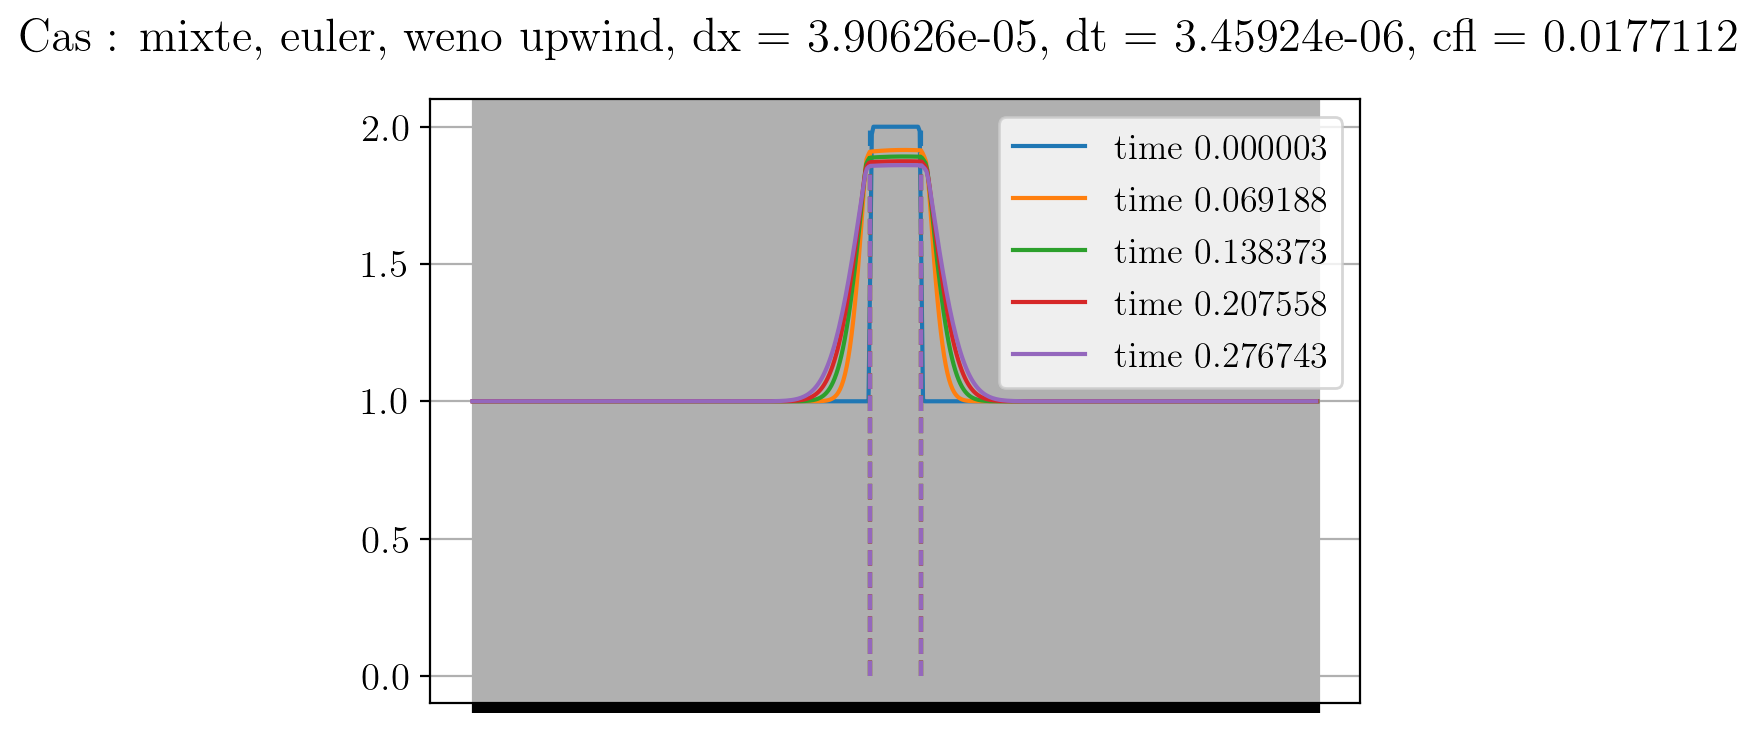

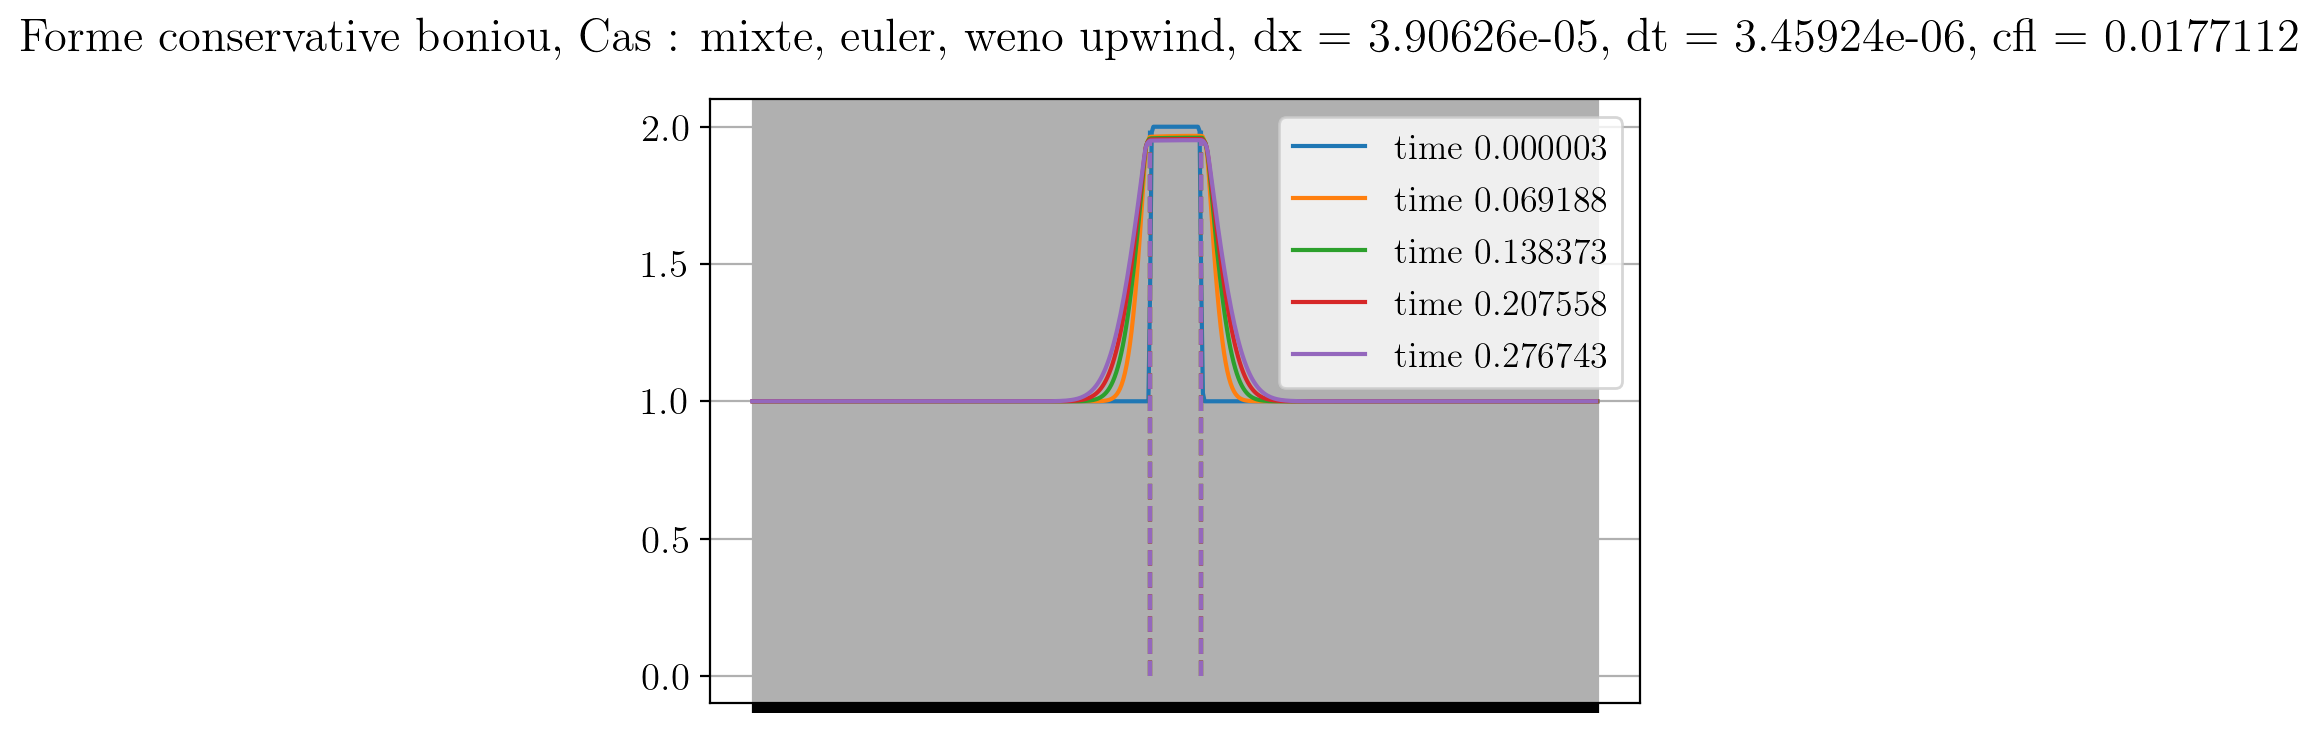

In [5]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    x, T = get_T_creneau(dx=dx, Delta=Delta, markers=markers)
    T = T + 1.
    prob = form(Delta, dx, lda_1, lda_2, rho_cp_1, rho_cp_2, markers, T, v, dt, cfl, fo,
                diff=1., schema='weno upwind', time_scheme='euler')
    E0 = prob.compute_energy()
    t, e = prob.timestep(n=100000, number_of_plots=5, debug=False, plotter=Plotter('decale'))
    l = ax1.plot(t, e, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()